In [1]:
import os
os.chdir("../src")
print(os.getcwd())

import copy
import numpy as np
import math
import operator
import matplotlib.pyplot as plt

from poc.run_cts_agent import train_td3, train_her_td3
from poc.cts_vis_utils import visualize


%matplotlib inline
%load_ext autoreload
%autoreload 2

/scratch/cluster/clw4542/dshape/src


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages

In [2]:
# run experiments
base_path = "/scratch/cluster/clw4542/pointworld_td3_results"

def run_expts(expt_dict, n_runs=5):
    for expt_name, expt_settings in expt_dict.items():
        for run_id in range(n_runs):
            expt_settings["expt_params"]["run_id"] = run_id
            task_vars = expt_settings["task_vars"]
            task_log_name = expt_settings["task_log_name"]
            expt_params = expt_settings["expt_params"]
            train_fn = expt_settings["train_fn"]

            train_fn(task_vars, task_log_name, **expt_params)

## D-Shape+TD3 on Pointworld


In [3]:
global_td3_exp_params = {
    "env_size": 1, 
    "goal": np.array([-0.4,  0.4]),
    "max_episode_steps": 100,
#     "gradient_steps": 100,
#     "rew_delay": 20
}

### Sparse Reward, reward base=-1

In [7]:
# Expt A: sparse reward results
# expt specifications
sparse_expt_dict = {
    "td3_sparse_rew-base=-1": {"task_vars": ["time_feat"],
            "task_log_name": "td3_sparse_rew-base=-1",
            "train_fn": train_td3,
            "expt_params": {**global_td3_exp_params,
                            "rew_base_value": -1,
                            "sparse_rew": True
                           }
              },
    
    "dshape_td3_sparse_rew-base=-1": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_td3_sparse_rew-base=-1",
               "train_fn": train_her_td3,
               "expt_params": {**global_td3_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "rew_base_value": -1,
                              }
              }
}

# run_expts(sparse_expt_dict, n_runs=5)

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


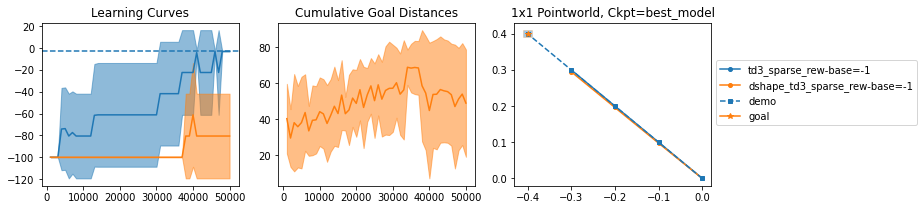

In [6]:
visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[1, 2, 3, 4, 5])

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


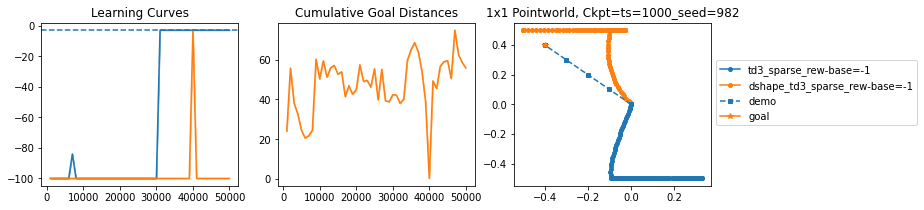

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


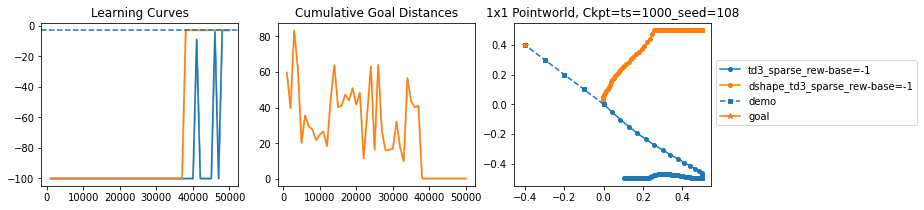

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


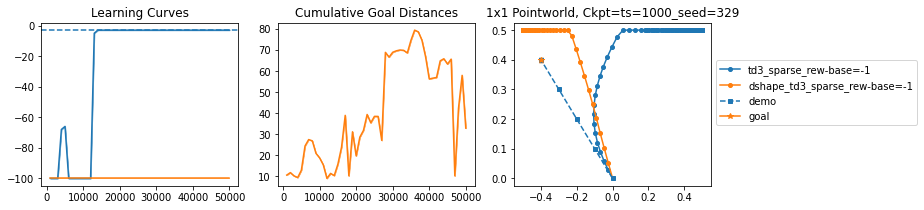

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


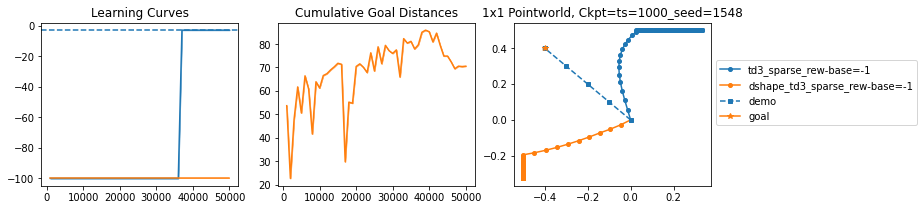

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


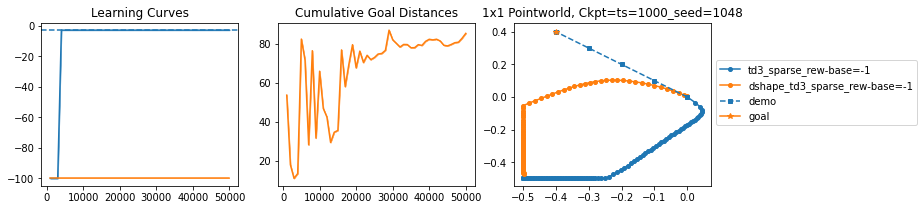

In [8]:
# early training visualization
seeds = [982, 108, 329, 1548, 1048]
for run_id in [1,2,3,4,5]:
    visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[run_id], ckpt_name=f"ts=1000_seed={seeds[run_id-1]}")

### Sparse reward, reward base=0

In [4]:
# Expt A: sparse reward results
# expt specifications
global_td3_exp_params["env_size"] = 1
sparse_expt_dict = {
    "td3_sparse_rew-base=0": {"task_vars": ["time_feat"],
            "task_log_name": "td3_sparse_rew-base=0",
            "train_fn": train_td3,
            "expt_params": {**global_td3_exp_params,
                            "rew_base_value": 0,
                            "sparse_rew": True
                           }
              },
    "pbrs_td3_sparse_rew-base=0": {"task_vars": ["time_feat",  "potential"],
             "task_log_name": "pbrs_td3_sparse_rew-base=0",
             "train_fn": train_td3,
             "expt_params": {**global_td3_exp_params,
                            "rew_base_value": 0,
                             "sparse_rew": True
                            }
              },
    "dshape_td3_sparse_rew-base=0": {"task_vars": ["time_feat", "her"],
               "task_log_name": "dshape_td3_sparse_rew-base=0",
               "train_fn": train_her_td3,
               "expt_params": {**global_td3_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "rew_base_value": 0,
                               "sparse_rew": True
                              }
             },
}

# run_expts(sparse_expt_dict, n_runs=5)

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


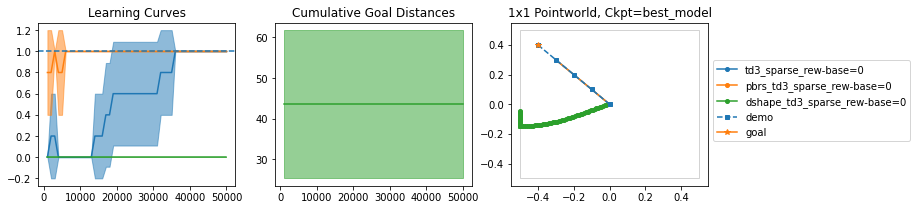

In [5]:
visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[1, 2, 3, 4, 5])

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


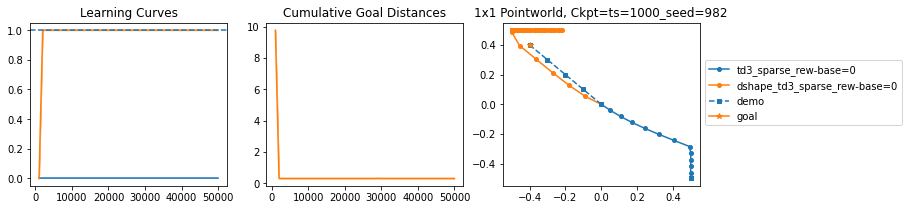

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


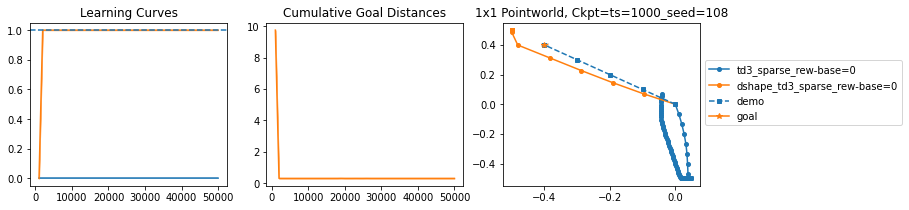

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


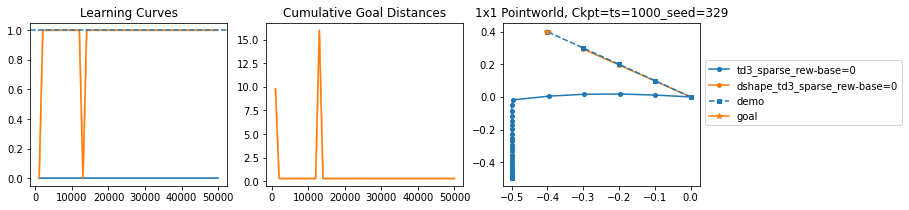

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


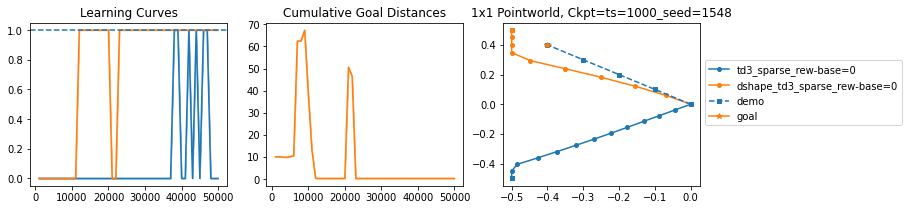

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


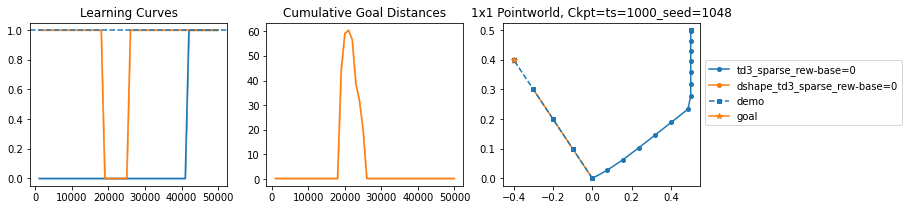

In [10]:
# early training visualization
seeds = [982, 108, 329, 1548, 1048]
for run_id in [1,2,3,4,5]:
    # early training
    visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[run_id], ckpt_name=f"ts=1000_seed={seeds[run_id-1]}")

### Larger Env

In [19]:
env_size = 5
global_td3_exp_params["env_size"]  = env_size
# Expt A: sparse reward results
# expt specifications
sparse_expt_dict = {
    f"td3_sparse_rew-base=0_env-size={env_size}": {"task_vars": ["time_feat"],
            "task_log_name": f"td3_sparse_rew-base=0_env-size={env_size}",
            "train_fn": train_td3,
            "expt_params": {**global_td3_exp_params,
                            "rew_base_value": 0,
                            "sparse_rew": True
                           }
              },
    f"pbrs_td3_sparse_rew-base=0_env-size={env_size}": {"task_vars": ["time_feat",  "potential"],
             "task_log_name": f"pbrs_td3_sparse_rew-base=0_env-size={env_size}",
             "train_fn": train_td3,
             "expt_params": {**global_td3_exp_params,
                            "rew_base_value": 0,
                             "sparse_rew": True
                            }
              },
    f"dshape_td3_sparse_rew-base=0_env-size={env_size}": {"task_vars": ["time_feat", "her"],
               "task_log_name": f"dshape_td3_sparse_rew-base=0_env-size={env_size}",
               "train_fn": train_her_td3,
               "expt_params": {**global_td3_exp_params, 
                               "goal_sampling_strategy": "random",
                               "n_sampled_goal": 3,
                               "rew_base_value": 0,
                               "sparse_rew": True
                              }
             },
}

# run_expts(sparse_expt_dict, n_runs=5)

Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Loading a model without an environment, this model cannot be trained until it has a valid environment.


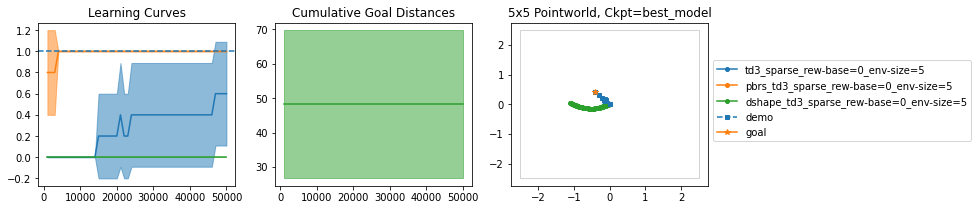

In [21]:
visualize(base_path, sparse_expt_dict, algo_name="td3", run_ids=[1, 2, 3, 4, 5])